In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.optimize import curve_fit
import math

[-4.34739320e-02  1.92021995e-04 -2.21344472e-08]
[5.77291856e-03 6.91275574e-06 1.77522688e-09]
[-24.40175522   3.63169742]
[0.73384819 0.09882681]


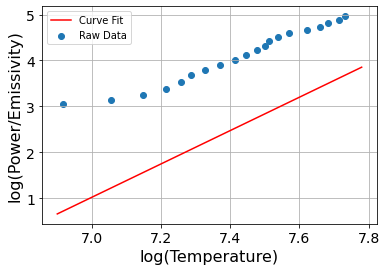

In [53]:
source = 'Physics_307_Lab_5.csv'

file = open(source)
#print(file)

csvreader = csv.reader(file)
#print(csvreader)

data = pd.read_csv(source)

current_float = [float(x) for x in data['I']]
m_current_float = [float(x) for x in data['I_d']]
voltage_float = [float(x) for x in data['V']]
temp_float = [float(x) for x in data['T']]
m_voltage_float = [float(x) for x in data['V_d']]
red_float = [float(x) for x in data['Si Red V_d']]
green_float = [float(x) for x in data['Si Green V_d']]

log_temp = [np.log(x) for x in temp_float]
#print(log_red)

power = np.multiply(m_current_float, m_voltage_float)
log_power = [np.log(x) for x in power]

source2 = 'Emissivity Table.csv'

file2 = open(source2)
#print(file)

csvreader = csv.reader(file2)
#print(csvreader)

data2 = pd.read_csv(source2)

temperature = [float(x) for x in data2['Temp']]
emissivity = [float(x) for x in data2['Total emissivity']]

def fitting_function(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2
popt, pcov = curve_fit(fitting_function, temperature[0:33], emissivity[0:33], p0 = [-0.1, 0.0002, -0.00000001])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

e_emissivity = [popt[0] + popt[1]*x + popt[2]*x**2 for x in temp_float]
#print(e_emissivity)

p_e = np.divide(power, e_emissivity)
log_p_e = [np.log(x) for x in p_e]

#print(log_p_e)

#plt.plot(power, temp_float)
plt.scatter(log_temp, log_p_e, label = 'Raw Data')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('log(Temperature)', fontsize = 16)
plt.ylabel('log(Power/Emissivity)', fontsize = 16)

plt.grid()

def fitting_function2(x, a0, a1):
    return a0 + a1*x
    #return a0 + np.exp(a1*x)
popt2, pcov2 = curve_fit(fitting_function2, log_temp, log_power, p0 = [3, 0.0015])
print(popt2)
perr2 = np.sqrt(np.diag(pcov2))
print(perr2)

time = np.arange(6.9, 7.8, 0.02)
temp = np.arange(1000, 2300, 29)
temp2 = np.arange(0, 3600, 33)
plt.plot(time, fitting_function2(time, *popt2), label = 'Curve Fit', color = 'r')

plt.legend()

#plt.savefig('power_emissivity.png', bbox_inches='tight')

[-16.62775425   0.02193206]
[2.25597244e+00 1.39909617e-03]


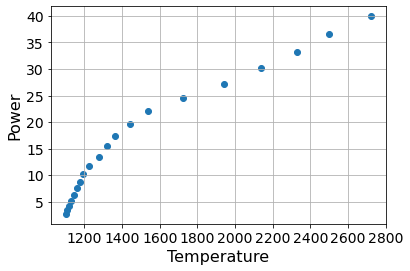

In [74]:
plt.scatter(temp_float, power)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Temperature', fontsize = 16)
plt.ylabel('Power', fontsize = 16)

plt.grid()

def fitting_function1(x, a0, a1):
    return a0 + a1*x
popt1, pcov1 = curve_fit(fitting_function1, temp_float, power, p0 = [-0.1, 4])
print(popt1)
perr1 = np.sqrt(np.diag(pcov1))
print(perr1)

#plt.savefig('disp_fit2.png', bbox_inches='tight')

[ 8.68650503e+00 -1.98640280e+04]
[2.88618191e-01 5.48745642e+02]


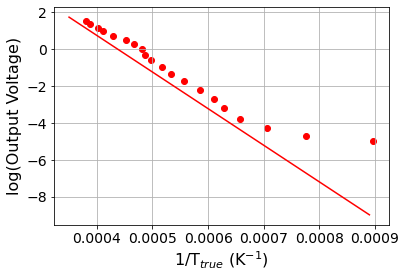

In [51]:
red_float = [float(x) for x in data['Si Red V_d']]
green_float = [float(x) for x in data['Si Green V_d']]

inverse_temp = [1/x for x in temp_float]
log_green = [np.log(x) for x in green_float]
log_red = [np.log(x) for x in red_float]

true_temp1 = [np.exp(22135/x)-1 for x in temp_float]
true_temp2 = np.multiply(true_temp1, e_emissivity)
true_temp3 = [np.log(x+1) for x in true_temp2]
true_temp = [22135/x for x in true_temp3]

inv_true_temp = [1/x for x in true_temp]

def fitting_function2(x, a0, a1):
    return a0 + a1*x
    #return a0 + a2*np.exp(a1*x)
popt2, pcov2 = curve_fit(fitting_function2, inv_true_temp[2:-1], log_green[2:-1], p0 = [4, -10000])
print(popt2)
perr2 = np.sqrt(np.diag(pcov2))
print(perr2)

plt.scatter(inv_true_temp, log_red, color = 'r')

inv_temp = np.arange(0.00035, 0.0009, 0.00003)
#print(current)
plt.plot(inv_temp, fitting_function2(inv_temp, *popt2), label = 'Curve Fit', color = 'r')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('1/T$_{true}$ (K$^{-1}$)', fontsize = 16)
plt.ylabel('log(Output Voltage)', fontsize = 16)

plt.grid()

#plt.savefig('red_fit_true.png', bbox_inches='tight')